In [61]:
%matplotlib inline
from pathlib import Path
import json

from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
from skimage.segmentation  import find_boundaries, clear_border
from skimage import color, measure, draw
from scipy import ndimage
from skimage.morphology import binary_erosion, binary_dilation, convex_hull_image, convex_hull_object
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops
from shapely.geometry import shape, Point, Polygon, mapping


In [78]:
coords = {'vollsmose':{'left_edge_lng': 10.386036, 
                       'bottom_edge_lat': 55.400343, 
                       'right_edge_lng': 10.457705, 
                       'top_edge_lat': 55.419517,
                       'map_shape': (859, 1676)
                      },
          'bylderup':{'lllon': 8.86837, 'lllat': 54.889246, 'urlon': 9.445496, 'urlat': 55.065394,
                      'map_shape': (800, 1679)
                     }
}
town = 'vollsmose'

def convert_to_lat_lng(xy, left_edge_lng, right_edge_lng, top_edge_lat, bottom_edge_lat, map_shape):
    """Return a transformed coordinate array with the same dimensions as `xy` in (lat, lng) order"""
    geo = np.zeros_like(xy)
    # Pixel coordinates for latitude are reversed
    dist_lat = (top_edge_lat - bottom_edge_lat)
    relative_dist_from_top = xy[:, 0] / map_shape[0]
    geo[:, 0] = bottom_edge_lat + (1 - relative_dist_from_top) * dist_lat

    dist_lng = (left_edge_lng - right_edge_lng)
    geo[:, 1] = left_edge_lng - (xy[:, 1] / map_shape[1]) * dist_lng
    return geo


{"type": "Polygon", "coordinates": [[[10.442096894391408, 55.40734072875436], [10.439317368735084, 55.407452335273575], [10.437777939140812, 55.407854118742726], [10.43690131951074, 55.40869116763679], [10.436217128579953, 55.41072240628638], [10.435019794451074, 55.411883114086145], [10.434763222852029, 55.41250811059371], [10.434977032517901, 55.41351256926659], [10.433736936455848, 55.414137565774155], [10.43335207905728, 55.41485184749709], [10.43335207905728, 55.415231309662396], [10.433886603221957, 55.41557728987194], [10.436195747613366, 55.41617996507567], [10.438291082338903, 55.41626925029104], [10.439402892601432, 55.41584514551804], [10.440450559964201, 55.41438310011641], [10.44164789409308, 55.41369113969732], [10.442075513424822, 55.41190543538999], [10.442930752088307, 55.411191153667055], [10.443315609486874, 55.40938312805588], [10.442845228221957, 55.40759742374854], [10.442096894391408, 55.40734072875436]]]}
{"type": "Polygon", "coordinates": [[[10.43076498210024, 

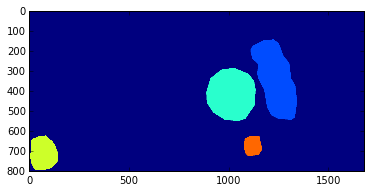

In [79]:
image_file = Path("/Users/anders/Dropbox/Maps/DigitaliseredeKort/V_AFA_HA.png")
image_data = plt.imread(str(image_file))

gimg = color.colorconv.rgb2grey(image_data)
bwimg = gimg > 0

# make sure it's closed
bwimg = binary_dilation(bwimg, None)
bwimg = ndimage.binary_fill_holes(bwimg)
# shrink it
clear_border(bwimg)

labeled_img = measure.label(bwimg, background=0)

# clear_border

contours = []
poly_img = np.zeros_like(bwimg)

for region in regionprops(labeled_img):
    # skip small images
    if region.area < 100:
        continue
    for contour in measure.find_contours(bwimg == region.label, 0.5):
        # Is shape closed?
        if tuple(contour[0]) == tuple(contour[-1]):
            poly = approximate_polygon(contour, tolerance=5)
            rr, cc = draw.polygon(poly[:,0], poly[:,1])
            poly_img[rr, cc] = region.label
            
            geo = convert_to_lat_lng(poly, **coords[town])
            #             y = np.abs(y - map_height)
            
            lat = geo[:, 0]
            lng = geo[:, 1]
            poly_shape = Polygon(zip(lng, lat))
            print(json.dumps(mapping(poly_shape)))


plt.imshow(measure.label(poly_img, background=0))

#for new_s in measure.find_contours(bwimg, 0.5):
#    print(new_s.shape)

#contours = [approximate_polygon(new_s, 0.9) for new_s in measure.find_contours(bwimg, 0.5)]

In [47]:
clear_border?